#  1: Data Cleaning
Import necessary libraries and load the dataset:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve


In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
df.describe

<bound method NDFrame.describe of          step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1          

Check for missing values:

In [6]:
# Check for missing values
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


Handle missing values:
NO missing values present

Detect and handle outliers:


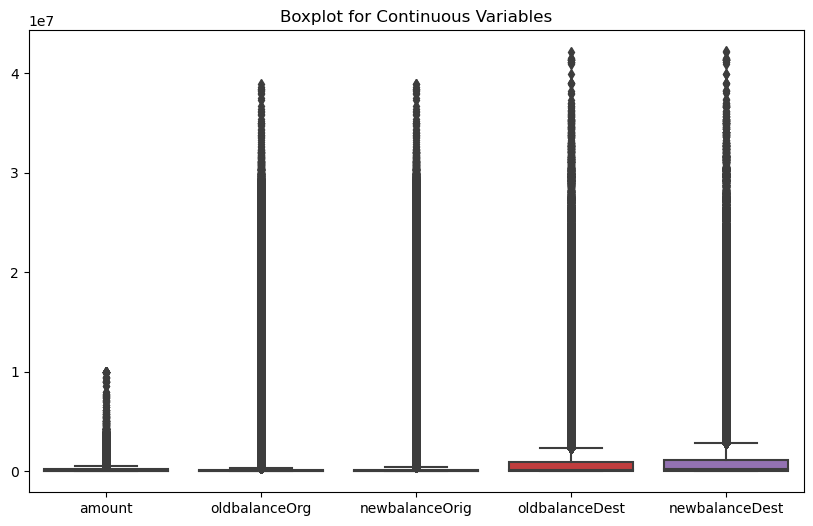

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
plt.title('Boxplot for Continuous Variables')
plt.show()


Multi-collinearity:

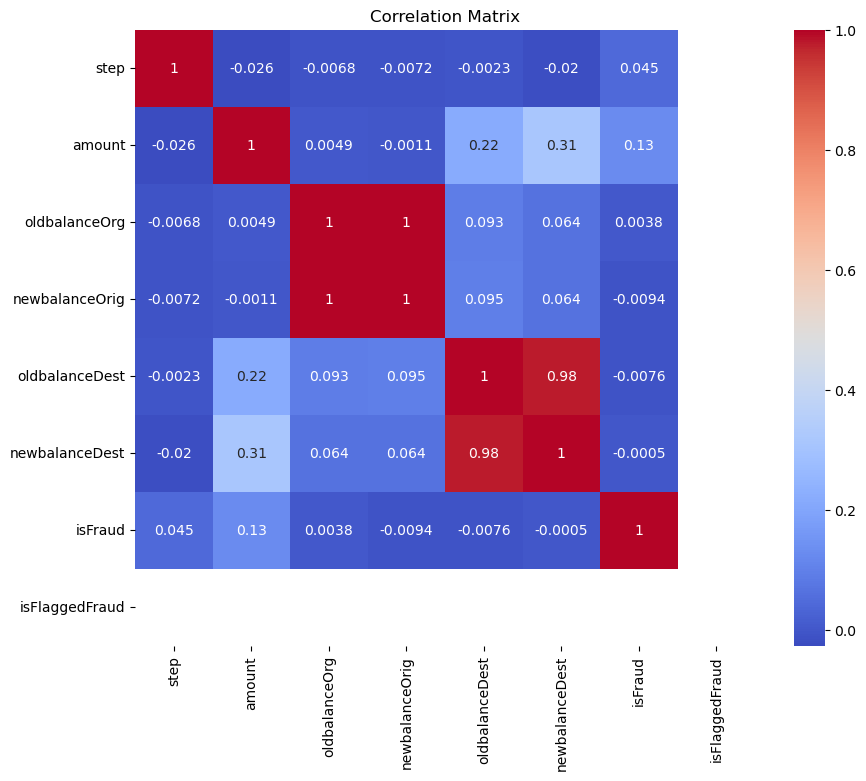

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Convert categorical 'type' to dummy variables
''''df = pd.get_dummies(df, columns=['type'], drop_first=True)'''


"'df = pd.get_dummies(df, columns=['type'], drop_first=True)"

In [11]:
# Drop non-informative columns
''''df.drop(columns=['nameOrig', 'nameDest'], inplace=True)'''

"'df.drop(columns=['nameOrig', 'nameDest'], inplace=True)"

In [12]:
''''df.drop(['feature_with_high_vif'], axis=1, inplace=True)  '''


"'df.drop(['feature_with_high_vif'], axis=1, inplace=True)  "

# 2: Describe Your Fraud Detection Model
Split the data:

In [13]:
# Feature Selection
## Selecting features to be included in the model
X = df[[ 'amount', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']


In [14]:
# Split data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Model Training
## Using Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.45      0.29      0.36       343

    accuracy                           1.00    314573
   macro avg       0.73      0.65      0.68    314573
weighted avg       1.00      1.00      1.00    314573

[[314109    121]
 [   242    101]]


In [19]:
## ROC AUC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc}')



ROC AUC Score: 0.7384119578155274


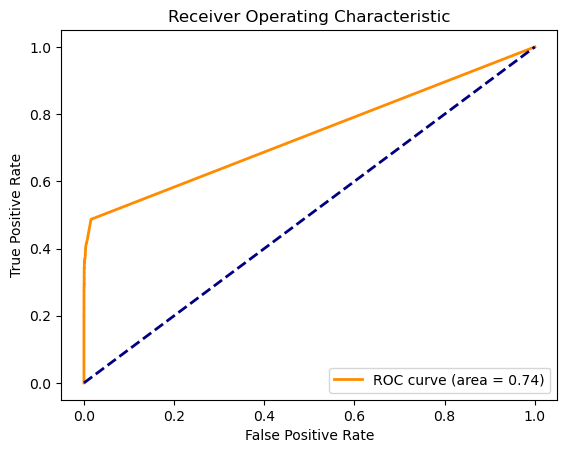

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [30]:
# Interpretation
## Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

amount            0.563606
newbalanceDest    0.253660
oldbalanceDest    0.176677
newbalanceOrig    0.006057
dtype: float64


In [31]:
# Key Factors
key_factors = feature_importance.index[:5]
print(f'Key factors predicting fraud: {key_factors}')

Key factors predicting fraud: Index(['amount', 'newbalanceDest', 'oldbalanceDest', 'newbalanceOrig'], dtype='object')


# # Actionable Insights
## Prevention Strategies
prevention_strategies = """
1. Implement real-time transaction monitoring systems.
2. Enhance authentication processes for high-risk transactions.
3. Conduct regular audits and update fraud detection models.
4. Educate customers about common fraud schemes.
5. Utilize machine learning models to dynamically adjust fraud detection rules.
"""

# 
# Evaluation of Prevention Strategies
## Track fraud rates before and after implementation.
## Conduct A/B testing to measure the effectiveness of new measures.
## Monitor feedback from customers and internal teams.
"""